In [1]:
from alntk.alignment import Alignment, write_to_fasta
from alntk.plotting import default_plot_style
from alntk.pca import get_pca

import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_folder = '../data/'
color_cycle = default_plot_style()

# Compare additional metrics for the chosen alignment

*Written by Shoichi Yip. Last update: 20 December 2024.*

Some of these statistics require weights to be computed. The procedure to compute these weights is detailed in [this Kaggle notebook](https://www.kaggle.com/code/shoyip/compute-weights-of-alignments) which uses the adabmDCA adabmDCA. The resulting files are `new_aln_weights.txt` and `iter_aln_weights.txt`, respectively for the `new_aln.faa` and `iter_aln.faa` alignments. Each row corresponds to each sequence, sorted in the same order. Weights have been computed with a threshold of 0.8.

## Principal Component Analysis

Number of sequences: 101543
Number of positions: 693


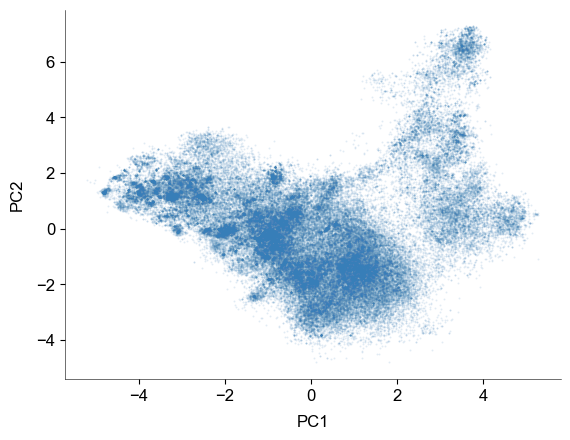

In [50]:
aln = Alignment()
aln.import_from_fasta(data_folder + 'new_aln.faa')
aln.print_report()

get_pca(aln, '')
plt.show()

Number of sequences: 101543
Number of positions: 260


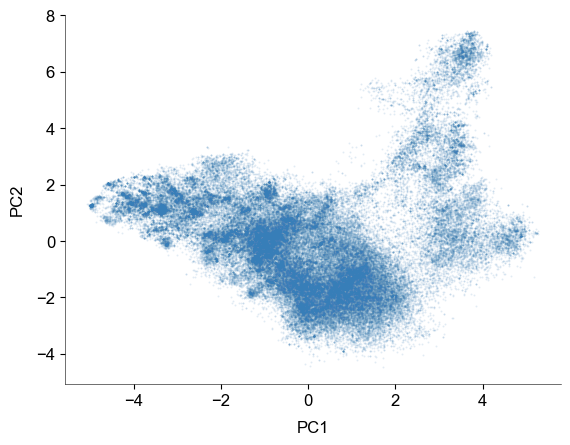

In [51]:
aln = Alignment()
aln.import_from_fasta(data_folder + 'iter_aln.faa')
aln.print_report()

get_pca(aln, '')
plt.show()

## Number of effective sequences

In [3]:
new_aln_w = np.loadtxt(data_folder + 'new_aln_weights.txt')
iter_aln_w = np.loadtxt(data_folder + 'iter_aln_weights.txt')

In [4]:
new_aln_w.shape, iter_aln_w.shape

((101543,), (101543,))

In [5]:
np.sum(new_aln_w)

6106.085608733607

In [6]:
np.sum(iter_aln_w)

25434.150821796735

## Distribution of correlation matrix elements

In [3]:
def get_histogram_values(correlation_matrix):
    counts, bin_edges = np.histogram(correlation_matrix[np.triu_indices(correlation_matrix.shape[0])], 100)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
    return bin_centers, counts

In [4]:
corr_new = np.genfromtxt('../data/corr_new.csv', delimiter=',', dtype=float)
corr_shuffled_new = np.genfromtxt('../data/corr_shuffled_new.csv', delimiter=',', dtype=float)

In [5]:
corr_new_centers, corr_new_counts = get_histogram_values(corr_new)
corr_shuffled_new_centers, corr_shuffled_new_counts = get_histogram_values(corr_shuffled_new)

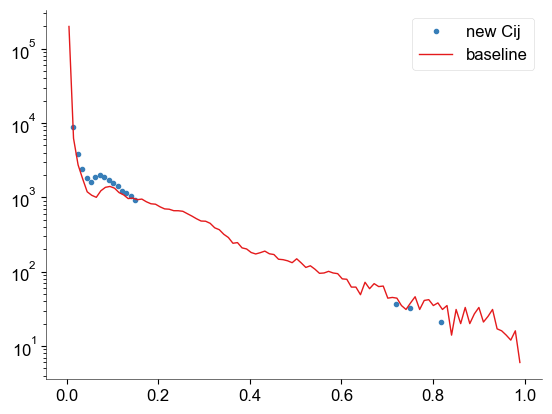

In [6]:
plt.figure()
plt.plot(corr_new_centers[corr_new_counts > corr_shuffled_new_counts], corr_new_counts[corr_new_counts > corr_shuffled_new_counts], '.', label='new Cij')
plt.plot(corr_shuffled_new_centers, corr_shuffled_new_counts, '-', label='baseline')
plt.yscale('log')
plt.legend()
plt.show()

In [7]:
corr_iter = np.genfromtxt('../data/corr_iter.csv', delimiter=',', dtype=float)
corr_shuffled_iter = np.genfromtxt('../data/corr_shuffled_iter.csv', delimiter=',', dtype=float)

In [8]:
corr_iter_centers, corr_iter_counts = get_histogram_values(corr_iter)
corr_shuffled_iter_centers, corr_shuffled_iter_counts = get_histogram_values(corr_shuffled_iter)

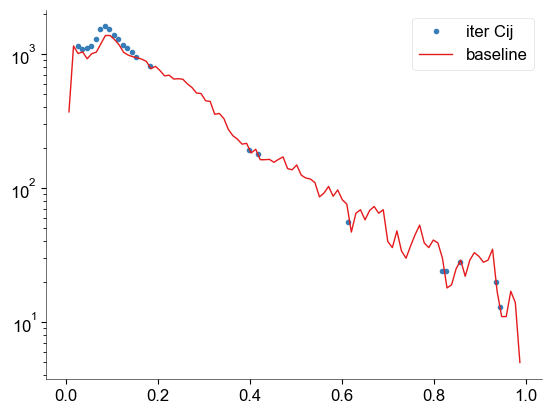

In [9]:
plt.figure()
plt.plot(corr_iter_centers[corr_iter_counts > corr_shuffled_iter_counts], corr_iter_counts[corr_iter_counts > corr_shuffled_iter_counts], '.', label='iter Cij')
plt.plot(corr_shuffled_iter_centers, corr_shuffled_iter_counts, '-', label='baseline')
plt.legend()
plt.yscale('log')
plt.show()

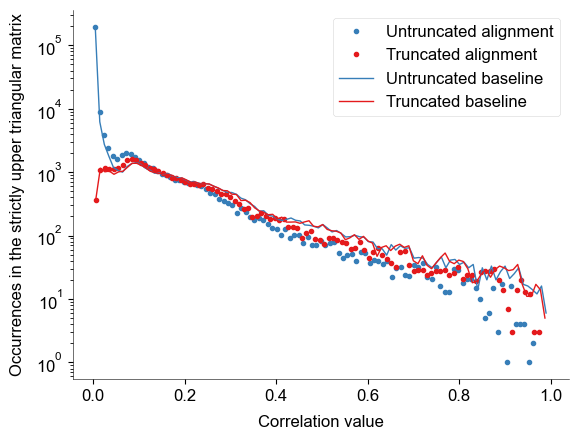

In [11]:
plt.figure()
plt.plot(corr_new_centers, corr_new_counts, '.', label='Untruncated alignment', color='#'+color_cycle[0])
plt.plot(corr_iter_centers , corr_iter_counts , '.', label='Truncated alignment', color='#'+color_cycle[1])
plt.plot(corr_shuffled_new_centers, corr_shuffled_new_counts, '-', label='Untruncated baseline', color='#'+color_cycle[0])
plt.plot(corr_shuffled_iter_centers , corr_shuffled_iter_counts , '-', label='Truncated baseline', color='#'+color_cycle[1])
plt.legend()
plt.xlabel('Correlation value')
plt.ylabel('Occurrences in the strictly upper triangular matrix')
plt.yscale('log')
plt.show()

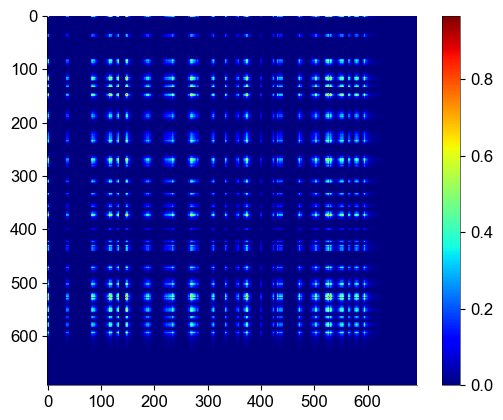

In [38]:
plt.figure()
plt.imshow(corr_new, cmap='jet')
plt.colorbar()
plt.show()

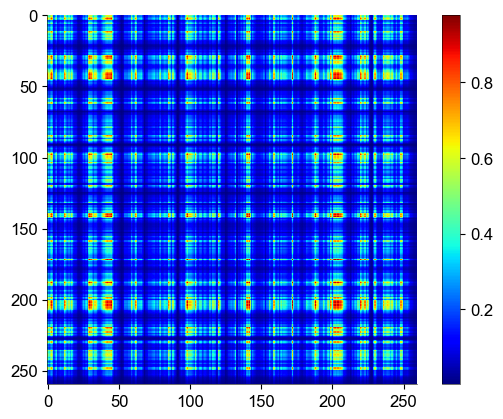

In [39]:
plt.figure()
plt.imshow(corr_iter, cmap='jet')
plt.colorbar()
plt.show()

# Sandbox

In [13]:
corr_new = np.genfromtxt('../data/corr_new.csv', delimiter=',', dtype=float)
corr_shuffled_new = np.genfromtxt('../data/corr_shuffled_new.csv', delimiter=',', dtype=float)

In [14]:
corr_new_centers, corr_new_counts = get_histogram_values(corr_new)
corr_shuffled_new_centers, corr_shuffled_new_counts = get_histogram_values(corr_shuffled_new)

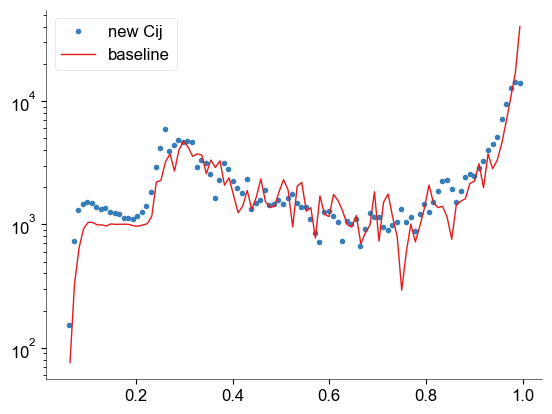

In [27]:
plt.figure()
plt.plot(corr_new_centers, corr_new_counts, '.', label='new Cij')
plt.plot(corr_shuffled_new_centers, corr_shuffled_new_counts, '-', label='baseline')
plt.yscale('log')
plt.legend()
plt.show()

In [16]:
corr_iter = np.genfromtxt('../data/corr_iter.csv', delimiter=',', dtype=float)
corr_shuffled_iter = np.genfromtxt('../data/corr_shuffled_iter.csv', delimiter=',', dtype=float)

In [17]:
corr_iter_centers, corr_iter_counts = get_histogram_values(corr_iter)
corr_shuffled_iter_centers, corr_shuffled_iter_counts = get_histogram_values(corr_shuffled_iter)

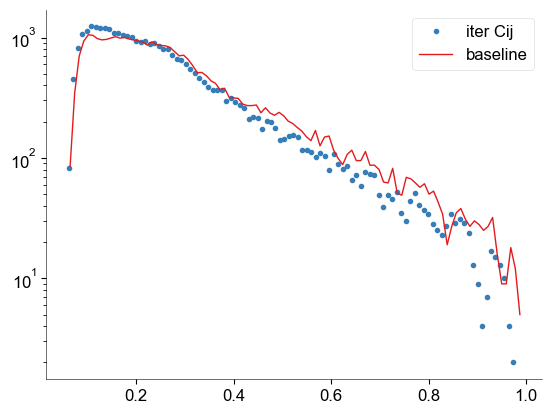

In [28]:
plt.figure()
plt.plot(corr_iter_centers, corr_iter_counts, '.', label='iter Cij')
plt.plot(corr_shuffled_iter_centers, corr_shuffled_iter_counts, '-', label='baseline')
plt.legend()
plt.yscale('log')
plt.show()

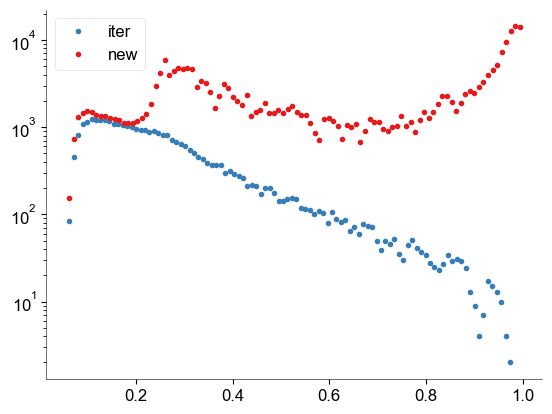

In [21]:
plt.figure()
plt.plot(corr_iter_centers, corr_iter_counts, '.', label='iter')
plt.plot(corr_new_centers, corr_new_counts, '.', label='new')
plt.legend()
plt.yscale('log')
plt.show()

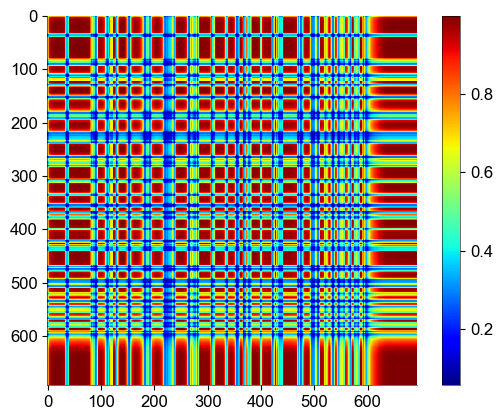

In [29]:
plt.figure()
plt.imshow(corr_new, cmap='jet')
plt.colorbar()
plt.show()

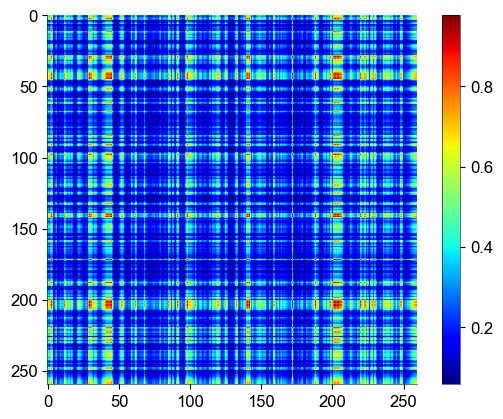

In [30]:
plt.figure()
plt.imshow(corr_iter, cmap='jet')
plt.colorbar()
plt.show()